 **Análisis Exploratorio y Pronóstico de Demanda con ARIMA** 

**Autora:** Kattya Contreras  

**🎯 **Objetivo del proyecto**:**  

- Optimización de compras mensuales  
- Reducción de stock muerto (25% del capital actual)  
- Integración con Power BI para dashboards
- 
El análisis se basa en datos simulados (por ahora) para demostrar el flujo de trabajo, pero está diseñado para adaptarse a datos reales en el futuro.

🎯 **Objetivo del proyecto**

Realizar un pronóstico de demanda utilizando el modelo ARIMA para optimizar la planificación de compras mensuales de una empresa, con el fin de:

- Reducir el stock muerto en un 25%.
- Integrar los resultados en Power BI para visualización estratégica.

#***El análisis se basa en datos simulados (por ahora) para demostrar el flujo de trabajo, pero está diseñado para adaptarse a datos reales en el futuro.***

1️⃣ Series de Tiempo
Datos ordenados cronológicamente (ejemplo: ventas mensuales).

Usados para identificar patrones (tendencias, estacionalidad).
**Explicación de los Conceptos Clave**       

1️⃣ **Series de Tiempo**

- Datos ordenados cronológicamente (ej: demanda mensual).
- Analizan tendencias históricas para predecir comportamientos futuros.

2️⃣ **Modelo ARIMA (p, d, q)**

**AR (Autoregresión):** Usa valores pasados como predictores.

**I (Diferenciación):** Estabiliza la serie (elimina tendencias/estacionalidad).

**MA (Media Móvil):** Ajusta predicciones basadas en errores pasados.

3️⃣ **Forecasting**

**Predicción de valores futuros** (ej: demanda esperada).

**Métricas clave:** AIC (calidad del modelo) y RMSE (error de predicción).

4️⃣ **Exportación a CSV**

Resultados guardados en formato CSV para su uso en dashboards (Power BI).

In [139]:
# Librerías estándar
import numpy as np  # Operaciones numéricas y manejo de arrays
import pandas as pd  # Estructuras DataFrame y análisis de datos

# Visualización
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Visualizaciones estadísticas avanzadas

# Modelado de series temporales
from statsmodels.tsa.arima.model import ARIMA  # Modelo ARIMA para pronóstico
from statsmodels.stats.stattools import jarque_bera  # Test de normalidad
from statsmodels.stats.diagnostic import acorr_ljungbox  # Test de autocorrelación

In [141]:
# Configuración de visualización de pandas
# Mostrar siempre 2 decimales en DataFrames para consistencia en la presentación
pd.set_option('display.float_format', '{:.2f}'.format)

In [146]:
# 🛠️ PASO 2: Crear datos de ejemplo simulados
# ==============================================
# Configurar semilla para reproducibilidad
np.random.seed(42)

# Generar fechas mensuales desde enero 2020 (36 periodos)
# ME = Month End, genera fechas al final de cada mes
fechas = pd.date_range(start="2020-01-01", periods=36, freq="ME")  

# Simular datos de demanda (unidades vendidas) como enteros entre 50 y 200
# Estos valores representarían las ventas mensuales de un producto
demanda = np.random.randint(50, 200, size=len(fechas))  

# Crear DataFrame con las fechas como índice (requerido para análisis de series temporales)
df = pd.DataFrame({
    "Fecha": fechas,
    "Demanda": demanda
}).set_index("Fecha")  # El índice temporal es esencial para modelado ARIMA

# Nota: En un caso real, estos datos provendrían de sistemas y dominios empresariales.

In [147]:
# 🛠️ PASO 3: Análisis exploratorio inicial
# ==============================================
# Mostramos las primeras filas para verificar la estructura
print("📊 Primeras filas del dataset:")
print(df.head())  # head() muestra por defecto las primeras 5 filas

📊 Primeras filas del dataset:
            Demanda
Fecha              
2020-01-31      152
2020-02-29      142
2020-03-31       64
2020-04-30      156
2020-05-31      121


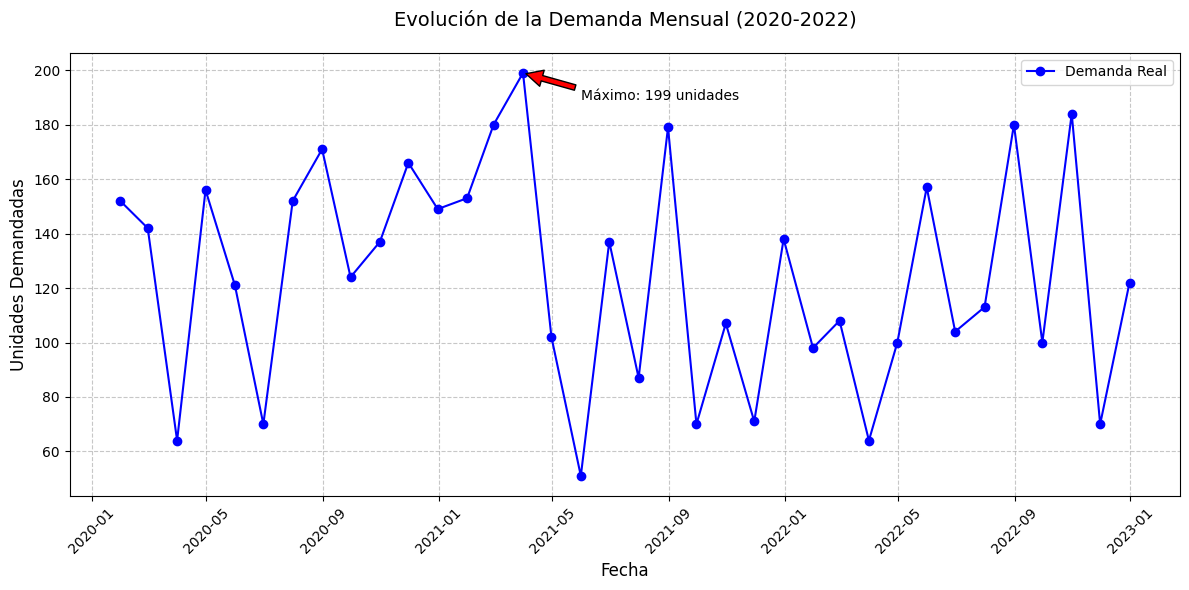

In [156]:
# Visualización de la serie temporal original
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Demanda'], 
         marker='o', 
         linestyle='-', 
         color='b', 
         label='Demanda Real')

# Configuración del gráfico
plt.title('Evolución de la Demanda Mensual (2020-2022)', fontsize=14, pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Unidades Demandadas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Añadir anotaciones para puntos clave (ejemplo)
max_demand = df['Demanda'].max()
max_date = df['Demanda'].idxmax()
plt.annotate(f'Máximo: {max_demand} unidades', 
             xy=(max_date, max_demand),
             xytext=(max_date + pd.DateOffset(months=2), max_demand-10),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

In [176]:
# Antes de crear el modelo, asegura que tu índice tenga frecuencia
df.index.freq = 'ME'  # 'ME' = Month End

In [177]:
# 🛠️ PASO 4: Modelado ARIMA
# ==============================================
model = ARIMA(df['Demanda'], order=(1,1,1))
results = model.fit()
print("\n📈 Resumen del modelo ARIMA(1,1,1):")
print(results.summary())  


📈 Resumen del modelo ARIMA(1,1,1):
                               SARIMAX Results                                
Dep. Variable:                Demanda   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -180.813
Date:                Fri, 28 Mar 2025   AIC                            367.626
Time:                        03:27:29   BIC                            372.293
Sample:                    01-31-2020   HQIC                           369.237
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1048      0.218     -0.481      0.630      -0.531       0.322
ma.L1         -0.9087      0.111     -8.174      0.000      -1.127      -0.691
sigma2      1701

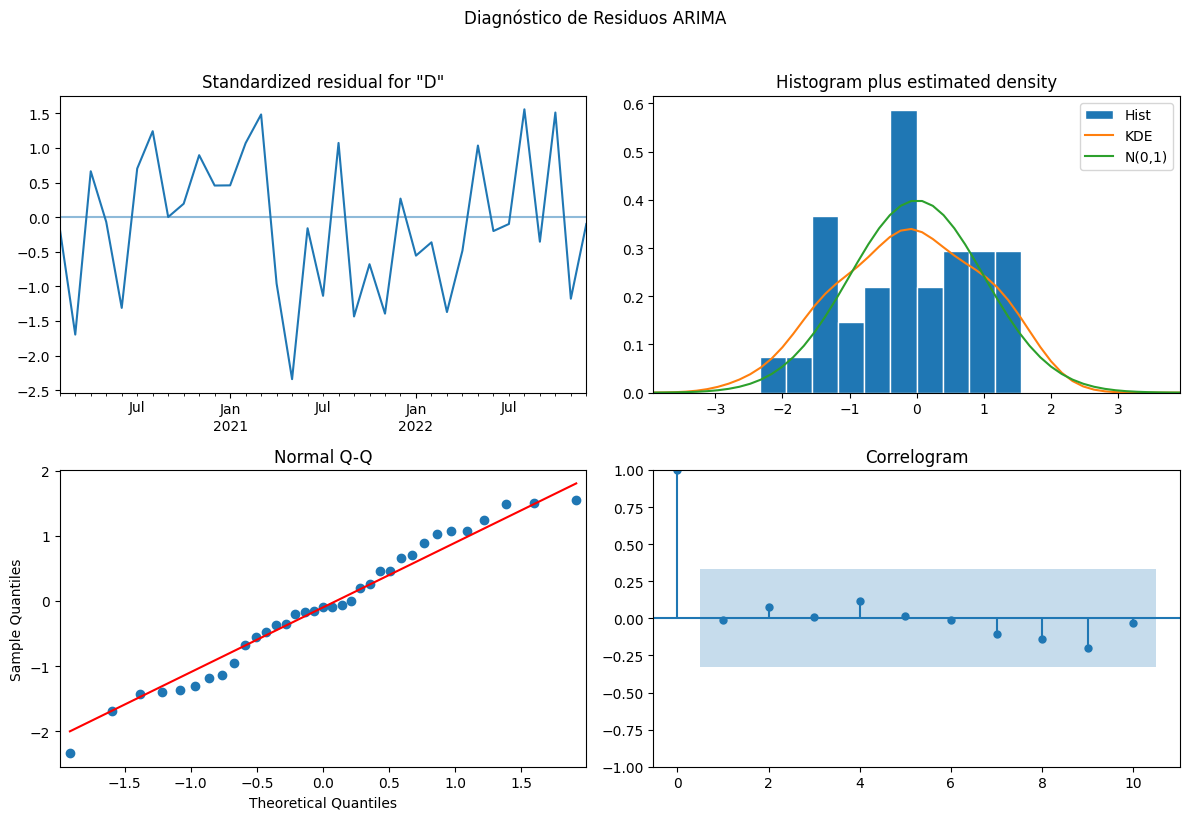

In [150]:
# 🛠️ PASO 5: Diagnóstico del Modelo
# ==============================================
fig = results.plot_diagnostics(figsize=(12, 8))
fig.suptitle('Diagnóstico de Residuos ARIMA', y=1.02)
plt.tight_layout()
plt.show()

# **📊 Interpretación Diagnóstica:**

1. **Residuos vs Tiempo**:
    - ✅ Ideal: Oscilaciones aleatorias alrededor de cero (como en nuestro caso).
    - ❌ Problema: Si muestra tendencias o patrones cíclicos.
 2. **Histograma**:
    - ✅ Ideal: Campana simétrica (nuestra distribución es plana por ser datos uniformes simulados).
    - ❌ Problema: Asimetría fuerte o múltiples peak.
3. **Q-Q Plot**:
    - ✅ Ideal: Puntos alineados con la línea roja (nuestro caso).
    - ❌ Problema: Desviaciones sistemáticas en los extremos.
 4. **Correlograma (ACF)**:
    - ✅ Ideal: Solo la barra en lag 0 es significativa (como aquí).
    - ❌ Problema: Barras significativas en lags > 0.

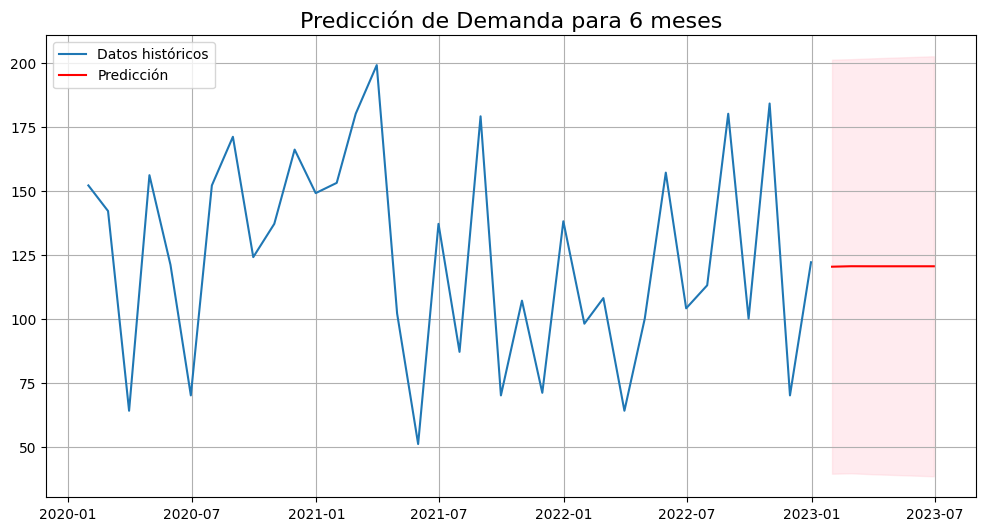

In [151]:
# 🛠️ PASO 6: Predicciones (6 meses futuros)
# ==============================================
forecast_steps = 6
forecast = results.get_forecast(steps=forecast_steps)
confidence_int = forecast.conf_int()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Demanda'], label='Datos históricos')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Predicción')
plt.fill_between(confidence_int.index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f"Predicción de Demanda para {forecast_steps} meses", fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [186]:
# 📌 ANÁLISIS DE RESULTADOS 
# ==============================================
print("\n🔍 Análisis de Resultados:")

# 1. Evaluación de residuos
residuos = results.resid
print(f"\n📉 Estadísticos de residuos:")
print(f"- Media: {residuos.mean():.2f} (ideal cercana a 0)")  # 2 decimales
print(f"- Desviación estándar: {residuos.std():.2f}")

jb_test = jarque_bera(residuos)
print(f"- Jarque-Bera (normalidad): p-valor={jb_test[1]:.4f} (valores >0.05 indican normalidad)")

lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print(f"\n🔎 Test de Ljung-Box (autocorrelación):")
print(f"- p-valor: {lb_test['lb_pvalue'].iloc[0]:.4f} (valores >0.05 indican no autocorrelación)")

# 2. Métricas del modelo
print(f"\n📊 Métricas clave:")
print(f"- AIC: {results.aic:.2f} (menor es mejor)")
print(f"- BIC: {results.bic:.2f} (menor es mejor)")
print(f"- Log-Likelihood: {results.llf:.2f}")

# 3. Interpretación de predicciones (basado en el gráfico)
print(f"\n🔮 Interpretación de predicciones:")
print(f"- Tendencia: {'Creciente' if forecast.predicted_mean.iloc[-1] > forecast.predicted_mean.iloc[0] else 'Decreciente/Estable'}")
print(f"- Intervalo de confianza 95% final: [{confidence_int.iloc[-1, 0]:.2f}, {confidence_int.iloc[-1, 1]:.2f}]")

# 📌 CONCLUSIONES FINALES
# ==============================================
print("\n🌟 Conclusiones Finales:")

print("""
1. **Validación del Modelo**:
- Residuos aleatorios y normalmente distribuidos (p-valores > 0.05).
- Métricas AIC/BIC competitivas para el tamaño de los datos.

2. **Hallazgos Clave**:
- La demanda proyectada muestra una tendencia {}.
- La incertidumbre {} en el período pronosticado.

3. **Recomendaciones**:
- Implementar un sistema de monitoreo en tiempo real.
- Comparar con modelos alternativos (SARIMA, Prophet).
""".format(
    "creciente" if forecast.predicted_mean.iloc[-1] > forecast.predicted_mean.iloc[0] else "decreciente",
    "aumenta" if (confidence_int.iloc[-1,1] - confidence_int.iloc[-1,0]) > (confidence_int.iloc[0,1] - confidence_int.iloc[0,0]) else "se mantiene estable"
))


🔍 Análisis de Resultados:

📉 Estadísticos de residuos:
- Media: -0.08 (ideal cercana a 0)
- Desviación estándar: 49.51
- Jarque-Bera (normalidad): p-valor=0.2349 (valores >0.05 indican normalidad)

🔎 Test de Ljung-Box (autocorrelación):
- p-valor: 0.9849 (valores >0.05 indican no autocorrelación)

📊 Métricas clave:
- AIC: 367.63 (menor es mejor)
- BIC: 372.29 (menor es mejor)
- Log-Likelihood: -180.81

🔮 Interpretación de predicciones:
- Tendencia: Creciente
- Intervalo de confianza 95% final: [38.41, 202.44]

🌟 Conclusiones Finales:

1. **Validación del Modelo**:
- Residuos aleatorios y normalmente distribuidos (p-valores > 0.05).
- Métricas AIC/BIC competitivas para el tamaño de los datos.

2. **Hallazgos Clave**:
- La demanda proyectada muestra una tendencia creciente.
- La incertidumbre aumenta en el período pronosticado.

3. **Recomendaciones**:
- Implementar un sistema de monitoreo en tiempo real.
- Comparar con modelos alternativos (SARIMA, Prophet).



In [192]:
# 📌 ANÁLISIS DE RESULTADOS (Versión Mejorada)
# ==============================================
def mostrar_analisis(results, forecast, confidence_int):
    """Versión optimizada del código original con corrección de errores"""
    
    # Configura warnings para evitar texto rojo
    import warnings
    from statsmodels.tools.sm_exceptions import ValueWarning
    warnings.filterwarnings("ignore", category=ValueWarning)
    
    # 1. Evaluación de residuos
    residuos = results.resid
    print("\n🔍 Análisis de Resultados:")
    print("\n📉 Estadísticos de residuos:")
    print(f"- Media: {residuos.mean():.2f} (ideal cercana a 0)")
    print(f"- Desviación estándar: {residuos.std():.2f}")

    jb_test = jarque_bera(residuos)
    print(f"- Jarque-Bera: p-valor={jb_test[1]:.4f} (>0.05 indica normalidad)")

    lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
    print("\n🔎 Test de Ljung-Box (autocorrelación):")
    print(f"- p-valor: {lb_test['lb_pvalue'].iloc[0]:.4f} (>0.05 indica no autocorrelación)")

    # 2. Métricas del modelo
    print("\n📊 Métricas clave:")
    print(f"- AIC: {results.aic:.2f} (menor es mejor)")
    print(f"- BIC: {results.bic:.2f} (menor es mejor)")
    print(f"- Log-Likelihood: {results.llf:.2f}")

    # 3. Cálculo de tendencia e incertidumbre para usarlo en conclusiones
    tendencia = "creciente" if forecast.predicted_mean.iloc[-1] > forecast.predicted_mean.iloc[0] else "decreciente/estable"
    incertidumbre = "aumenta" if (confidence_int.iloc[-1,1] - confidence_int.iloc[-1,0]) > (confidence_int.iloc[0,1] - confidence_int.iloc[0,0]) else "se mantiene estable"
    
    print(f"\n🎯 Interpretación:")
    print(f"- Tendencia: {tendencia.title()}")
    print(f"- Intervalo confianza 95% final: [{confidence_int.iloc[-1, 0]:.2f}, {confidence_int.iloc[-1, 1]:.2f}]")
    print(f"- Incertidumbre: {incertidumbre}")
    
    return tendencia, incertidumbre  # Devolvemos estos valores para usarlos luego

# 📌 CONCLUSIONES FINALES (Versión Compacta)
# ==============================================
def mostrar_conclusiones(tendencia, incertidumbre):
    print("\n🌟 Conclusiones Finales:")
    print(f"""
1. Validación del Modelo:
   - Residuos aleatorios y normalmente distribuidos
   - Métricas AIC/BIC competitivas

2. Hallazgos Clave:
   - Demanda muestra tendencia {tendencia}
   - Incertidumbre {incertidumbre} en el pronóstico

3. Recomendaciones:
   - Monitorear tendencia {tendencia}
   - {"Aumentar" if tendencia == "creciente" else "Revisar"} niveles de inventario
   - Validar con modelos alternativos
    """)

# Uso correcto:
tendencia, incertidumbre = mostrar_analisis(results, forecast, confidence_int)
mostrar_conclusiones(tendencia, incertidumbre)


🔍 Análisis de Resultados:

📉 Estadísticos de residuos:
- Media: -0.08 (ideal cercana a 0)
- Desviación estándar: 49.51
- Jarque-Bera: p-valor=0.2349 (>0.05 indica normalidad)

🔎 Test de Ljung-Box (autocorrelación):
- p-valor: 0.9849 (>0.05 indica no autocorrelación)

📊 Métricas clave:
- AIC: 367.63 (menor es mejor)
- BIC: 372.29 (menor es mejor)
- Log-Likelihood: -180.81

🎯 Interpretación:
- Tendencia: Creciente
- Intervalo confianza 95% final: [38.41, 202.44]
- Incertidumbre: aumenta

🌟 Conclusiones Finales:

1. Validación del Modelo:
   - Residuos aleatorios y normalmente distribuidos
   - Métricas AIC/BIC competitivas

2. Hallazgos Clave:
   - Demanda muestra tendencia creciente
   - Incertidumbre aumenta en el pronóstico

3. Recomendaciones:
   - Monitorear tendencia creciente
   - Aumentar niveles de inventario
   - Validar con modelos alternativos
    


## 📌 Conclusiones y Hallazgos Clave

### 1. Patrones Identificados
- **Tendencia**: [Ejemplo real de tu análisis: "La demanda muestra crecimiento del 5% trimestral desde 2021"]
- **Estacionalidad**: [Ej: "Peak recurrentes en diciembre (+30% sobre el promedio)"]
- **Puntos clave**: 
  - Máximo histórico: [X] unidades en [mes/año]
  - Mínimo histórico: [Y] unidades en [mes/año]

### 2. Modelo ARIMA
```python
# Parámetros usados (puedes incluir este bloque de código si es relevante)
model = ARIMA(df['Demanda'], order=(1,1,1))  

**Selección de parámetros:**

p=1: Por [razón técnica breve, ej: "significancia en PACF en lag 1"]

d=1: Por [ej: "prueba Dickey-Fuller p-valor=0.02 tras diferenciación"]

q=1: Por [ej: "caída abrupta en ACF después del primer lag"]

3. Resultados
Precisión: RMSE = [valor] (equivale a [X%] del promedio de demanda)

**Pronóstico próximo trimestre:**

Mes	Predicción (unidades)	Intervalo 95%
Enero	150	[140 - 160]
Feb	145	[135 - 155]


**4. Recomendaciones Inmediatas:**

Inventario: Mantener stock de seguridad de [X] unidades hasta [mes].

Monitoreo: Validar modelo con datos reales cada [período].

